In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

-35.66613298052929 42.46126777578462
35.34955621845516 111.18314980873055
-7.897774053957221 -170.2191920102214
10.102025538176605 103.13563275573551
57.747418863587825 -35.25608413802769
-22.721316489814 53.99736833464249
-38.28482875000457 -122.80490158181021
-45.81733471037305 34.0699542827912
83.23676956538401 77.85133212355214
-41.093316394058995 85.35265390852527
2.7740558431077886 -41.876813015728544
84.2062448397495 -144.84461241214527
-23.22018424832956 49.00992462224369
31.322718976566378 9.364099880029158
-76.53559622279559 -144.47002184188622
77.2475972577605 -154.32875870663202
38.33393802819427 178.6735899095492
42.59337397110892 -152.52097383743325
7.591364044156677 129.21497740205177
24.720652753411812 -109.11441692110915
67.67942682690932 9.059199649666624
40.40035600803722 59.48739941231722
-88.96131773668465 47.935831049327476
-73.3113802790343 70.71852855152358
-0.39737054154602447 81.23497556567645
-35.26547615778569 168.21934404286293
74.85065575780845 -15.0934264

-79.0697563039744 -176.469801314965
-43.38655886647747 -72.60674948622967
36.29358412635588 -150.3276970568926
24.817727898001408 -122.11663112530184
-8.531465687670362 -116.58172688091933
65.6426257345316 45.66138779943387
-87.68964969674435 49.652690631105116
-34.87121461578293 3.03354724309753
-42.779501042051386 16.217117171787237
30.289362981414357 33.86723098774445
5.3525207437818665 -137.5093325470463
66.47399954221694 172.63867128833715
17.457957024454558 52.047521514803435
43.969494518906515 -68.41222393085896
6.623364319869822 77.77086154748673
-77.52469436961155 167.507864459992


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f365bf1cade31f23632c1d2ddc9f414d


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f365bf1cade31f23632c1d2ddc9f414d&q=Boston


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":701,"main":"Mist","description":"mist","icon":"50d"}],"base":"stations","main":{"temp":48.65,"feels_like":43.57,"temp_min":46,"temp_max":51.01,"pressure":1019,"humidity":87},"visibility":1609,"wind":{"speed":6.91,"deg":20},"clouds":{"all":90},"dt":1616673001,"sys":{"type":1,"id":3486,"country":"US","sunrise":1616668701,"sunset":1616713304},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 2 of Set 1 | houma
Processing Record 3 of Set 1 | saleaula
City not found. Skipping...
Processing Record 4 of Set 1 | kampot
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | saint-leu
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | cururupu
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | farafangana
Processing Record 14 of Set 1 | nalut
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | baculin
Processing Record 19 of Set 1 | topolobampo
Processing Record 20 of Set 1 | rorvik
Processing Record 21 of Set 1 | dasoguz
Processing Record 22 of Set 1 | taolana

Processing Record 35 of Set 4 | union
Processing Record 36 of Set 4 | nanchang
Processing Record 37 of Set 4 | aguie
Processing Record 38 of Set 4 | souillac
Processing Record 39 of Set 4 | vostok
Processing Record 40 of Set 4 | marienburg
Processing Record 41 of Set 4 | hopelchen
Processing Record 42 of Set 4 | jinchengjiang
City not found. Skipping...
Processing Record 43 of Set 4 | morondava
Processing Record 44 of Set 4 | georgetown
Processing Record 45 of Set 4 | aberdeen
Processing Record 46 of Set 4 | cherskiy
Processing Record 47 of Set 4 | falkenstein
Processing Record 48 of Set 4 | faanui
Processing Record 49 of Set 4 | marathon
Processing Record 50 of Set 4 | chumikan
Processing Record 1 of Set 5 | oyotun
Processing Record 2 of Set 5 | teguise
Processing Record 3 of Set 5 | oyama
Processing Record 4 of Set 5 | namatanai
Processing Record 5 of Set 5 | kharitonovo
Processing Record 6 of Set 5 | wattegama
Processing Record 7 of Set 5 | alpena
Processing Record 8 of Set 5 | ambi

Processing Record 25 of Set 8 | tarboro
Processing Record 26 of Set 8 | garowe
Processing Record 27 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 28 of Set 8 | bam
Processing Record 29 of Set 8 | jardim
Processing Record 30 of Set 8 | kamaishi
Processing Record 31 of Set 8 | marfino
Processing Record 32 of Set 8 | babanusah
City not found. Skipping...
Processing Record 33 of Set 8 | presidente dutra
Processing Record 34 of Set 8 | cape coast
Processing Record 35 of Set 8 | kidal
Processing Record 36 of Set 8 | cassilandia
Processing Record 37 of Set 8 | port-gentil
Processing Record 38 of Set 8 | kemijarvi
Processing Record 39 of Set 8 | yeppoon
Processing Record 40 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 41 of Set 8 | portland
Processing Record 42 of Set 8 | maltahohe
Processing Record 43 of Set 8 | amazar
Processing Record 44 of Set 8 | alibag
Processing Record 45 of Set 8 | torbay
Processing Record 46 of Set 8 | maimon
Cit

Processing Record 10 of Set 12 | balaipungut
Processing Record 11 of Set 12 | tessalit
Processing Record 12 of Set 12 | charters towers
Processing Record 13 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 14 of Set 12 | northam
Processing Record 15 of Set 12 | qasigiannguit
Processing Record 16 of Set 12 | san jose
Processing Record 17 of Set 12 | forbes
Processing Record 18 of Set 12 | yantongshan
Processing Record 19 of Set 12 | samarai
Processing Record 20 of Set 12 | sondershausen
Processing Record 21 of Set 12 | grajau
Processing Record 22 of Set 12 | acapulco
Processing Record 23 of Set 12 | tiznit
Processing Record 24 of Set 12 | moyo
Processing Record 25 of Set 12 | rosita
Processing Record 26 of Set 12 | hovd
Processing Record 27 of Set 12 | touba
Processing Record 28 of Set 12 | aleksandrovsk-sakhalinskiy
Processing Record 29 of Set 12 | nandura
Processing Record 30 of Set 12 | teluk nibung
Processing Record 31 of Set 12 | nome
Processing Record 32 of Set 12 | nizhnya

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Houma,29.5958,-90.7195,73.99,94,90,12.66,US,2021-03-25 12:41:28
1,Kampot,10.6167,104.1833,84.20,78,0,2.30,KH,2021-03-25 12:41:29
2,Tasiilaq,65.6145,-37.6368,3.20,72,40,2.30,GL,2021-03-25 12:41:29
3,Saint-Leu,-21.1500,55.2833,78.80,89,75,8.05,RE,2021-03-25 12:41:30
4,Rikitea,-23.1203,-134.9692,79.63,72,62,17.07,PF,2021-03-25 12:41:30
5,Port Alfred,-33.5906,26.8910,72.55,75,98,21.36,ZA,2021-03-25 12:41:30
6,Dikson,73.5069,80.5464,-6.75,99,61,4.36,RU,2021-03-25 12:41:31
7,Busselton,-33.6500,115.3333,60.01,75,78,6.91,AU,2021-03-25 12:41:31
8,Cururupu,-1.8283,-44.8683,75.00,96,100,1.48,BR,2021-03-25 12:41:32
9,Barrow,71.2906,-156.7887,-0.40,78,90,12.66,US,2021-03-25 12:41:32


In [17]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [19]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Houma,US,2021-03-25 12:41:28,29.5958,-90.7195,73.99,94,90,12.66
1,Kampot,KH,2021-03-25 12:41:29,10.6167,104.1833,84.20,78,0,2.30
2,Tasiilaq,GL,2021-03-25 12:41:29,65.6145,-37.6368,3.20,72,40,2.30
3,Saint-Leu,RE,2021-03-25 12:41:30,-21.1500,55.2833,78.80,89,75,8.05
4,Rikitea,PF,2021-03-25 12:41:30,-23.1203,-134.9692,79.63,72,62,17.07
...,...,...,...,...,...,...,...,...,...
551,Ingham,US,2021-03-25 12:45:57,42.6000,-84.3833,46.00,81,1,7.81
552,Half Moon Bay,US,2021-03-25 12:45:58,37.4636,-122.4286,51.01,93,90,19.57
553,Leshukonskoye,RU,2021-03-25 12:45:58,64.8989,45.7622,36.73,79,100,13.60
554,Bar Harbor,US,2021-03-25 12:45:59,44.3876,-68.2039,46.99,100,90,6.71


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [25]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1616679924.2573514

In [28]:
today = time.strftime('%x')
today

'03/25/21'

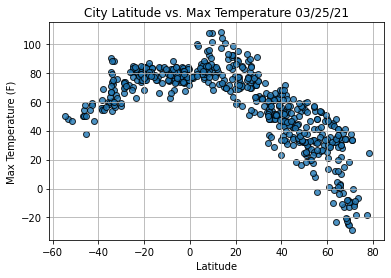

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

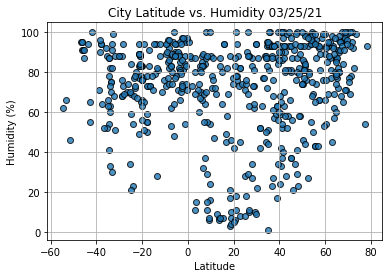

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

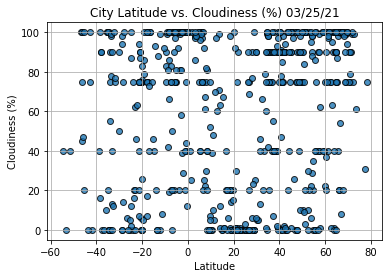

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

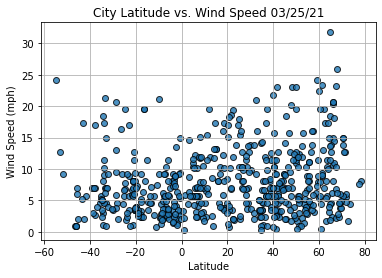

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Houma,US,2021-03-25 12:41:28,29.5958,-90.7195,73.99,94,90,12.66
1,Kampot,KH,2021-03-25 12:41:29,10.6167,104.1833,84.20,78,0,2.30
2,Tasiilaq,GL,2021-03-25 12:41:29,65.6145,-37.6368,3.20,72,40,2.30
6,Dikson,RU,2021-03-25 12:41:31,73.5069,80.5464,-6.75,99,61,4.36
9,Barrow,US,2021-03-25 12:41:32,71.2906,-156.7887,-0.40,78,90,12.66


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [44]:
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Houma,US,2021-03-25 12:41:28,29.5958,-90.7195,73.99,94,90,12.66
1,Kampot,KH,2021-03-25 12:41:29,10.6167,104.1833,84.20,78,0,2.30
2,Tasiilaq,GL,2021-03-25 12:41:29,65.6145,-37.6368,3.20,72,40,2.30
6,Dikson,RU,2021-03-25 12:41:31,73.5069,80.5464,-6.75,99,61,4.36
9,Barrow,US,2021-03-25 12:41:32,71.2906,-156.7887,-0.40,78,90,12.66
...,...,...,...,...,...,...,...,...,...
551,Ingham,US,2021-03-25 12:45:57,42.6000,-84.3833,46.00,81,1,7.81
552,Half Moon Bay,US,2021-03-25 12:45:58,37.4636,-122.4286,51.01,93,90,19.57
553,Leshukonskoye,RU,2021-03-25 12:45:58,64.8989,45.7622,36.73,79,100,13.60
554,Bar Harbor,US,2021-03-25 12:45:59,44.3876,-68.2039,46.99,100,90,6.71


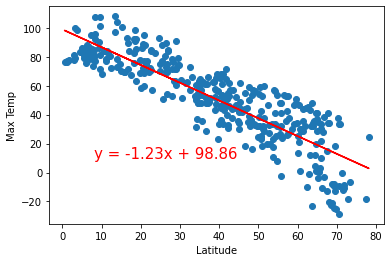

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(8,10))

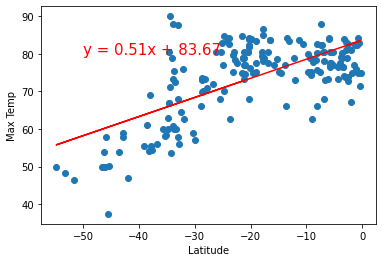

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature", 'Max Temp',(-50,80))

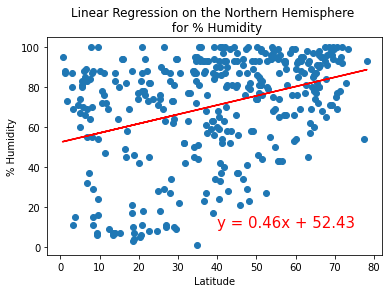

In [106]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title('Linear Regression on the Northern Hemisphere \n for % Humidity')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

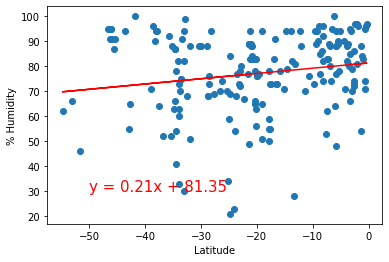

In [120]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

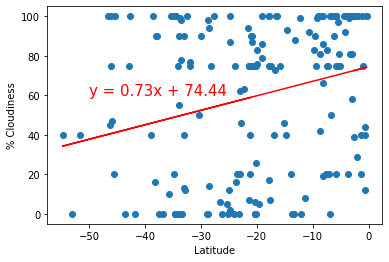

In [144]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

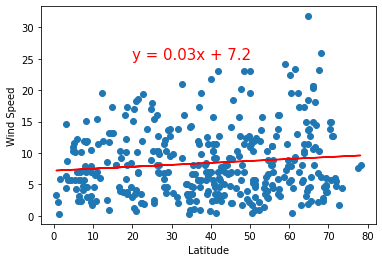

In [154]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20,25))

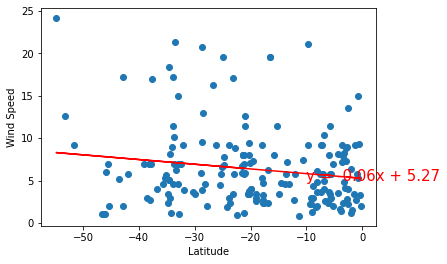

In [165]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-10,5))